In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [17]:
#read in data
dataset = pd.read_csv('data/data.csv')

In [18]:
print(min(dataset['danceability']))
print(max(dataset['danceability']))

0.0
0.988


In [19]:
def classify_value(val):
    if val < 0.25:
        return 'low'
    elif 0.25 <= val <= 0.75:
        return 'medium'
    else:
        return 'high'

In [20]:
dataset['dancerange'] = dataset['danceability'].apply(classify_value)

In [21]:
features = ['valence', 'acousticness', 'energy','instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']
x = dataset.loc[:, features].values
y = dataset['dancerange'].values

In [22]:
#Split data into train, test, validation sets
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


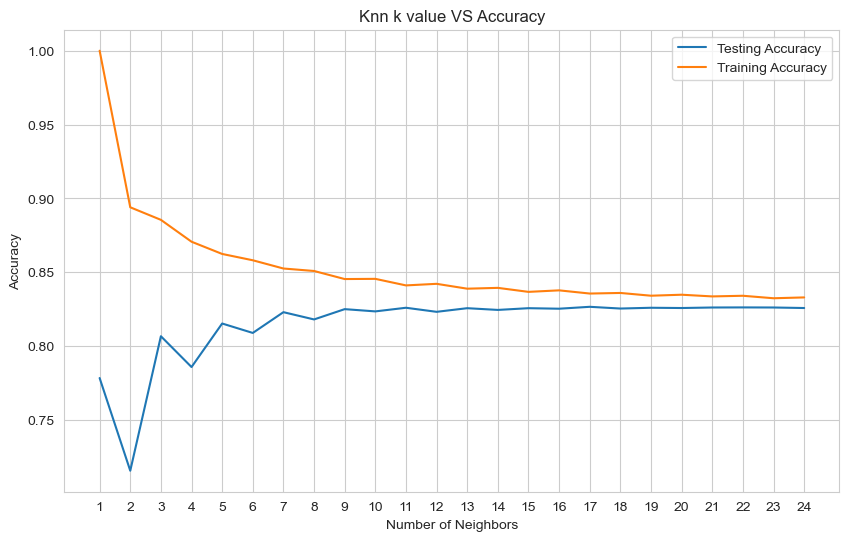

Best accuracy is 0.8266143208719091 with K = 17


In [26]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[10,6])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Knn k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [28]:
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=17) train accuracy is: ',knn.score(x_train,y_train))
print('With KNN (K=17) test accuracy is: ',knn.score(x_test,y_test))

With KNN (K=17) train accuracy is:  0.8355952464664932
With KNN (K=17) test accuracy is:  0.8266143208719091
